In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/Unemployment in India.csv')
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
data.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [ ]:
data=data.dropna()

In [ ]:
data.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


In [ ]:
data['Date']=pd.to_datetime(data[' Date'])

/tmp/ipython-input-3511283206.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date']=pd.to_datetime(data[' Date'])
/tmp/ipython-input-3511283206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date']=pd.to_datetime(data[' Date'])


In [ ]:
data['Date']

,Date
0,2019-05-31
1,2019-06-30
2,2019-07-31
3,2019-08-31
4,2019-09-30
...,...
749,2020-02-29
750,2020-03-31
751,2020-04-30
752,2020-05-31


In [ ]:
covid_data=data[data['Date']>'2020-3']
precovid_data=data[data['Date']<'2020-3']

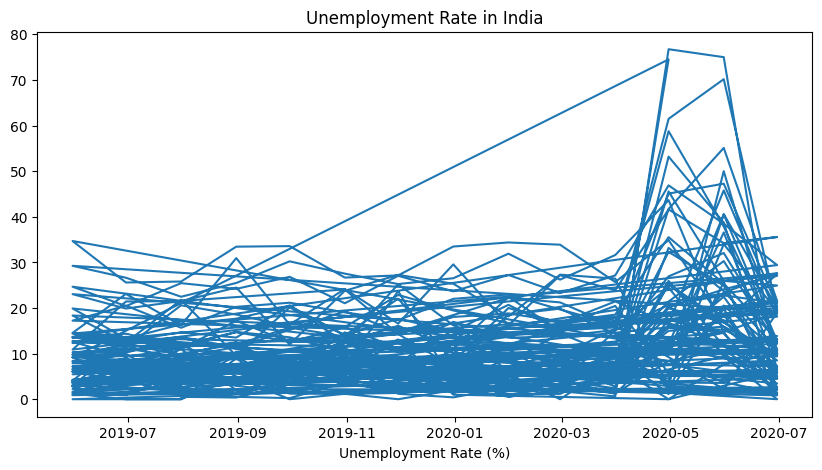

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data['Date'],data[' Estimated Unemployment Rate (%)'])
plt.xlabel('Date')
plt.xlabel('Unemployment Rate (%)')
plt.title('Unemployment Rate in India')
plt.show()

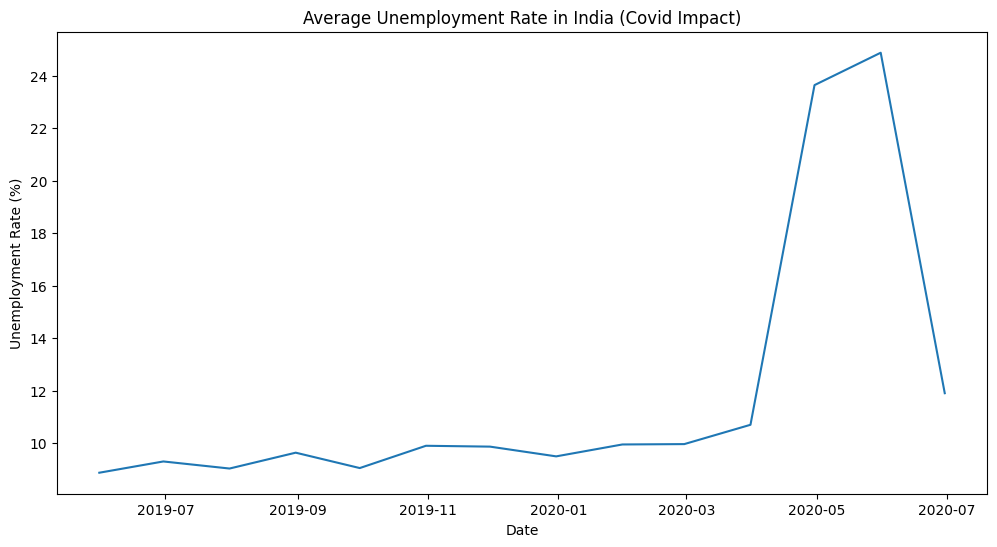

In [ ]:
national_trend = data.groupby('Date')[' Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(12,6))
plt.plot(national_trend.index, national_trend.values)
plt.title("Average Unemployment Rate in India (Covid Impact)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()

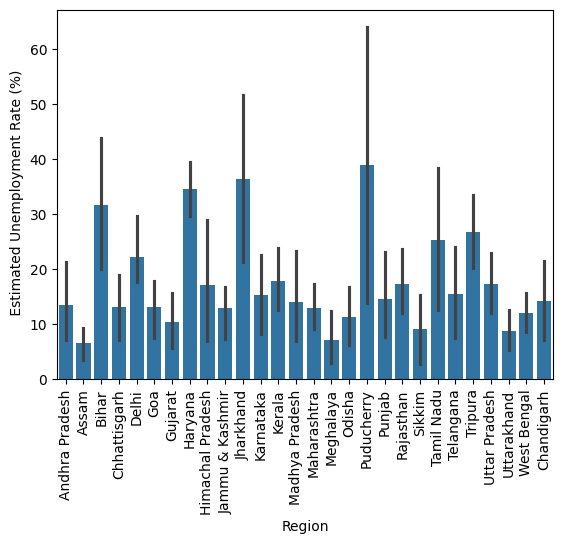

In [ ]:
sns.barplot(x='Region', y=' Estimated Unemployment Rate (%)', data=covid_data)
plt.xticks(rotation=90)
plt.show()
